# Tabla Y4-125

In [75]:
#!pip install specdal spectrum

Extraer datos

In [76]:
import os
#from specdal import Collection, Spectrum, read
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

datadir = "./Espectros_FORS_2/Y4"
archivos = list()
etiquetas = ['A1','A2','A3','A4','A5',
             'B1','B2','B3','B4','B5',
             'C1','C2','C3','C4','C5',
             'D1','D2','D3','D4','D5',
             'E1','E2','E3','E4','E5',
            ]

for f in os.listdir(datadir):
    title =str(f)[8:-8]
    archivos.append(f)
archivos.sort()

In [77]:
specs = list()
specs_df = list()
features = []

def dar_intervalo(inicio,fin):
    return [inicio-350,fin-350]
interval=dar_intervalo(450,2151)

ini=interval[0]
fin=interval[1]

In [78]:
for f in archivos:
    data = pd.read_csv(datadir+"/"+f,delimiter='\t')
    title =str(f)[:-4]
    dev_x = data['Wavelength'][ini:fin]
    dev_y = data[title][ini:fin]
    df = pd.DataFrame({'x': dev_x, 'y': dev_y})
    specs_df.append(df)
    tmp_arr = df.to_numpy()
    specs.append(tmp_arr)

    tmp = np.array(dev_y)
    features.append(tmp)
print(len(specs))
print(len(specs_df))
len(features)

125
125


125

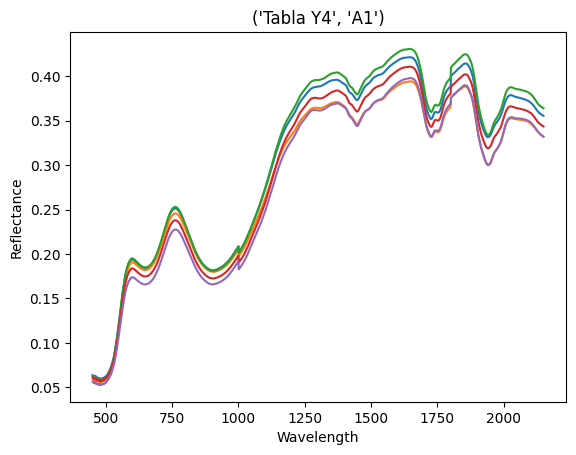

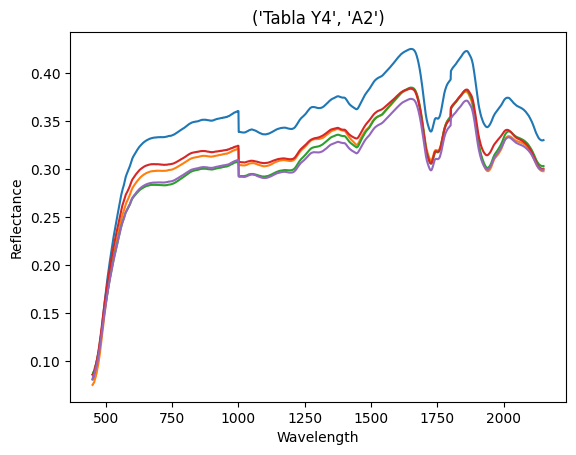

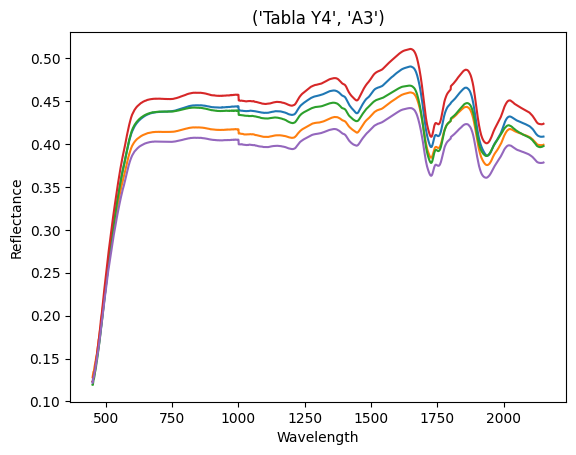

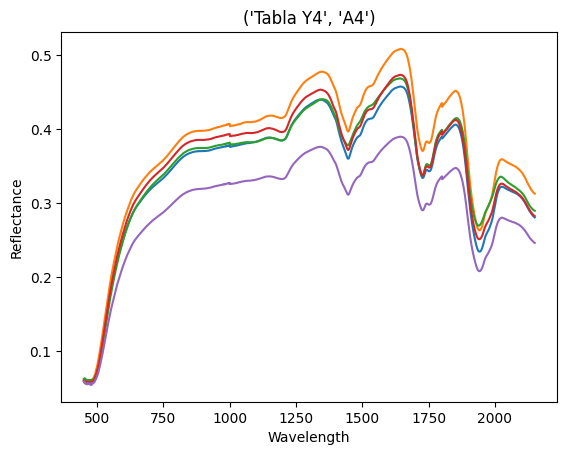

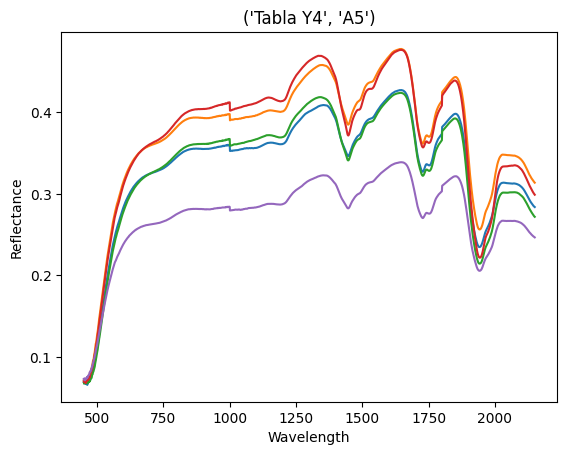

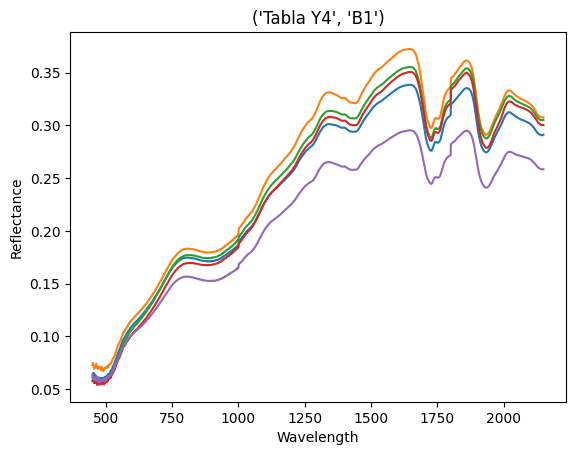

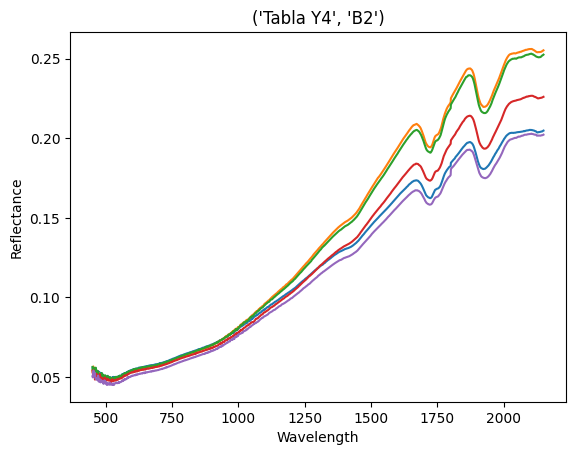

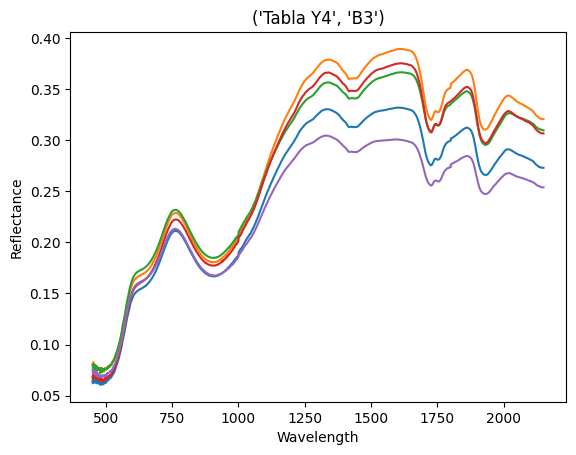

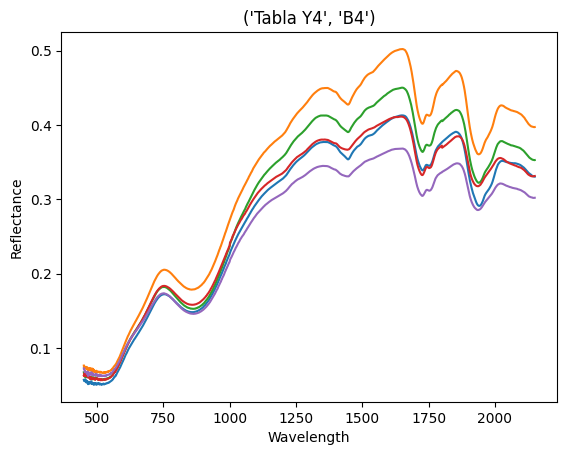

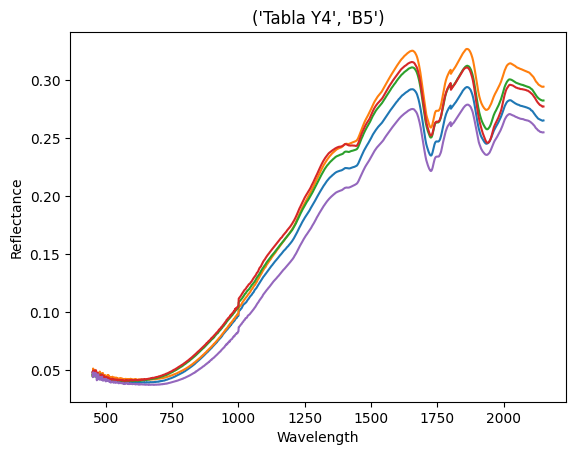

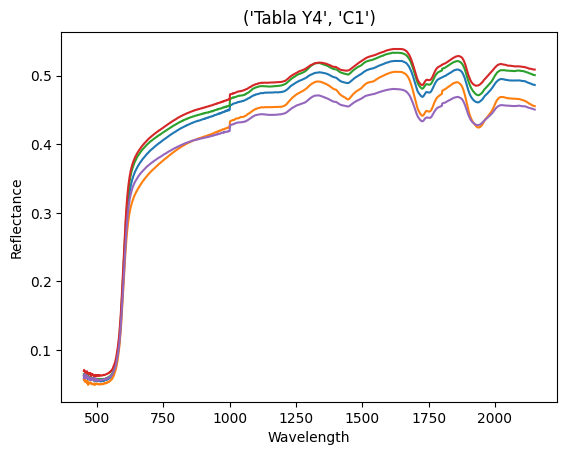

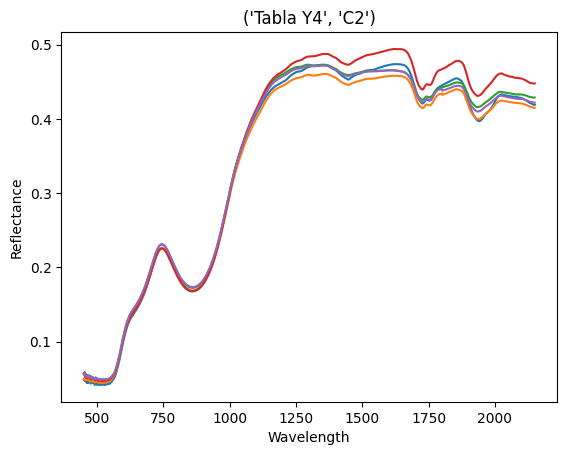

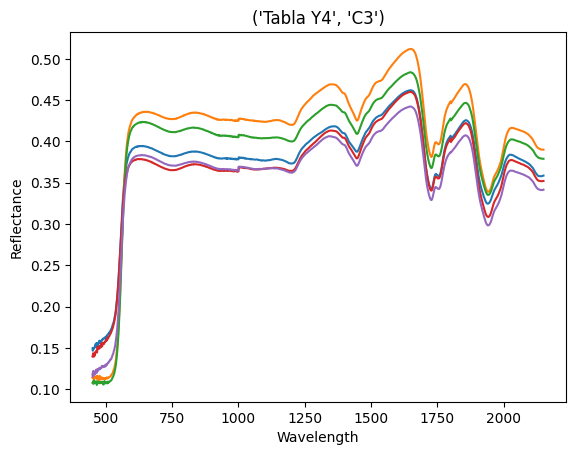

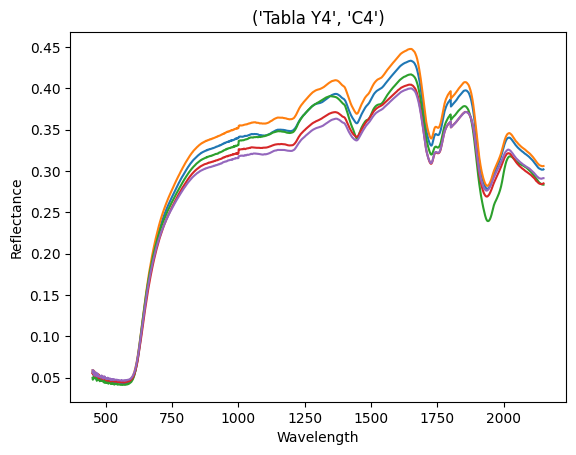

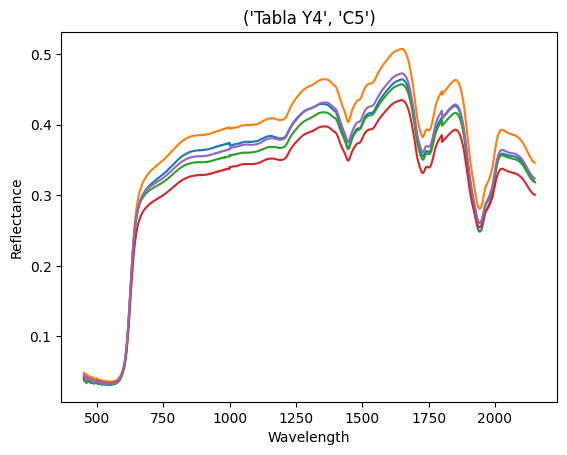

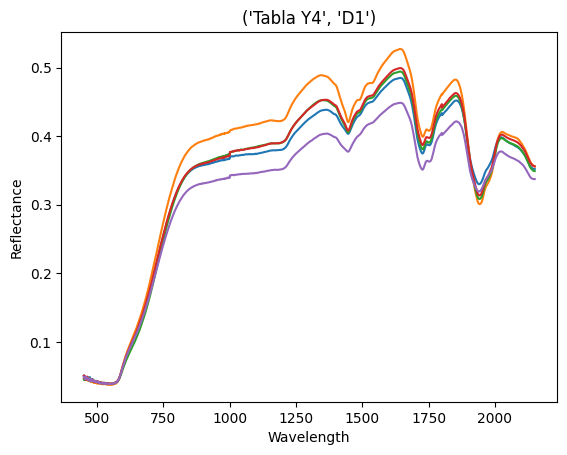

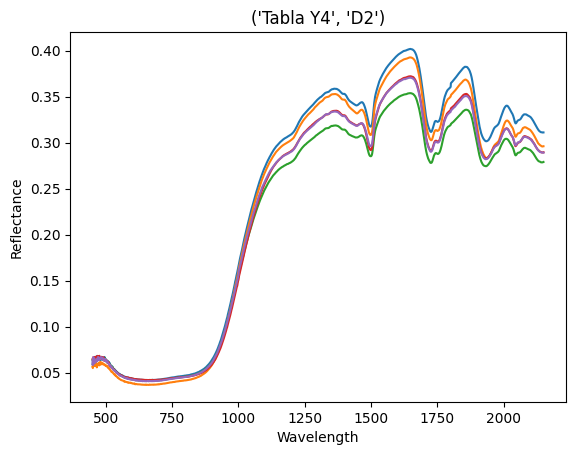

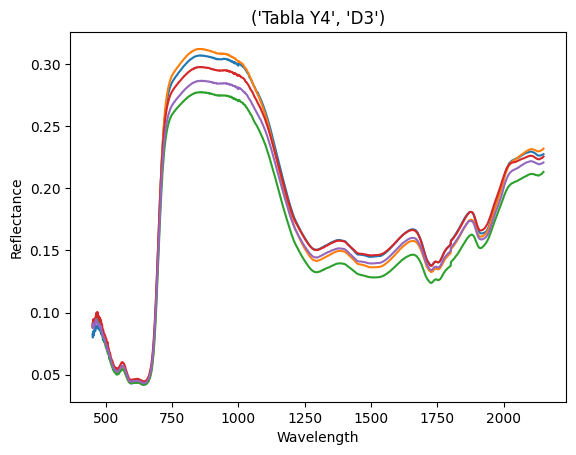

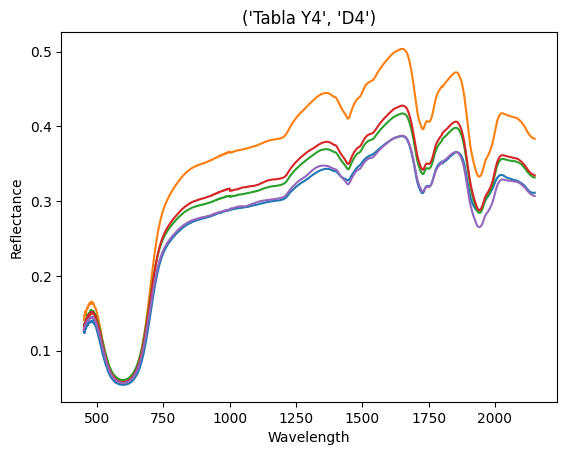

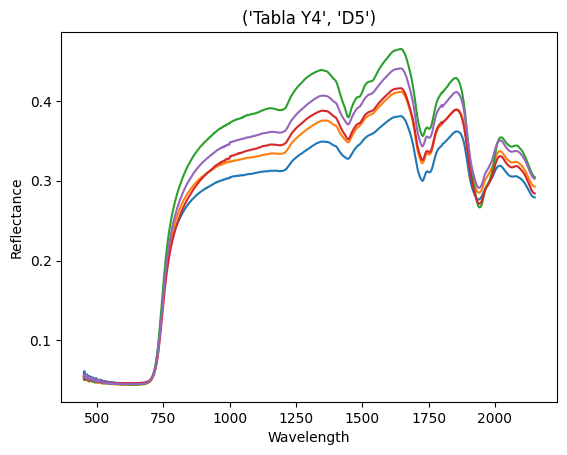

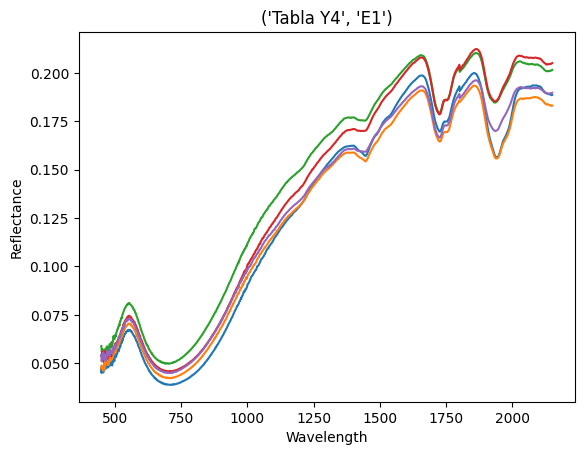

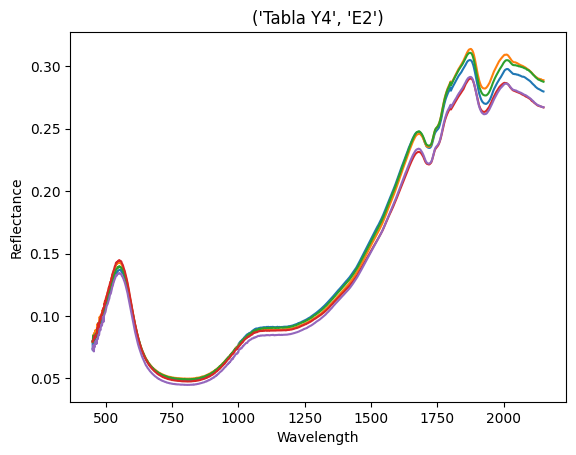

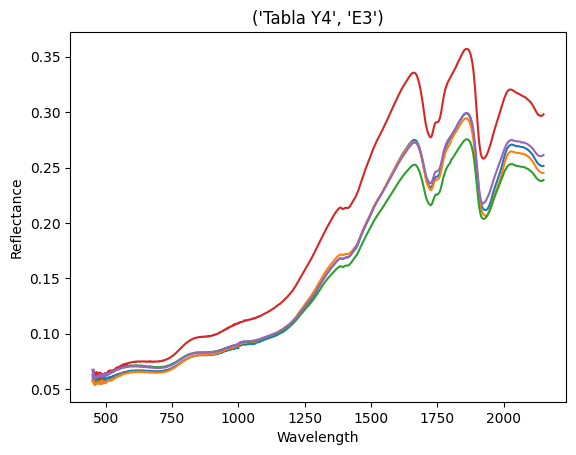

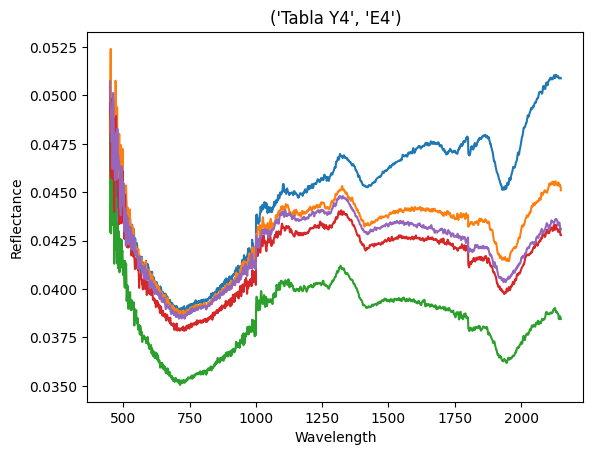

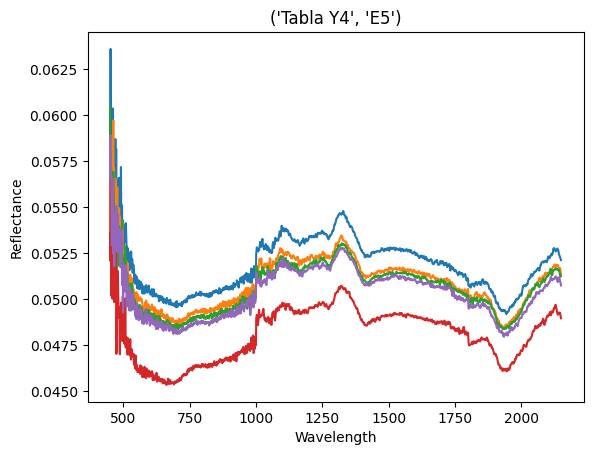

In [79]:
def imprimir_5_en_5():
    cont = 0
    aux = 0
    for f in specs_df:
        dev_x = f['x'].to_numpy()
        dev_y = f['y'].to_numpy()
        plt.plot(dev_x, dev_y)
        aux+=1
        if aux == 5:
            aux=0
            plt.xlabel('Wavelength')
            plt.ylabel('Reflectance')
            t = "Tabla Y4",etiquetas[cont]
            plt.title(t)
            plt.show()
            cont+=1
imprimir_5_en_5()

In [80]:
def imprime_todos():
    for f in specs_df:
        dev_x = f['x'].to_numpy()
        dev_y = f['y'].to_numpy()
        print(dev_y)
        plt.ylabel('Reflectance')
        plt.xlabel('Wavelength')
        t = "Tabla Y4"#,etiquetas[cont]
        plt.plot(dev_x, dev_y)
        plt.title(t)
        plt.show()
      
        cont+=1

In [81]:
#feature_names = data['feature_names']
feature_names = ['wavelength','reflectance']

#labels = np.concatenate((lista, lista))
#features=np.concatenate((features, features))
indexes = dev_x
labels = [i for i in range(25) for _ in range(5)]
print(len(labels))
print(len(features))

125
125


# Bayes ingenuo

In [82]:
temp_f=features
# Función auxiliar  Cuenta las diferencias entre dos listas y 
# muestra el índice donde son diferentes.
def show_differences(list1, list2):
  differences = {}
  for i in range(len(list1)):
    if list1[i] != list2[i]:
      differences[i] = [list1[i], list2[i]]
  return differences
features=temp_f

In [83]:
train, test, train_labels, test_labels = train_test_split(
   features,labels,test_size = 1, random_state = 22
)

#print(train)
#print(test)
#print(train_labels)
#print(test_labels)


GNBclf = GaussianNB()

model = GNBclf.fit(train, train_labels)
print(len(model.classes_))
test=features[:125]
preds = GNBclf.predict(test)
print(preds)
print(show_differences(preds, labels))
print(GNBclf.score(test,labels))

25
[ 0  0  0  0  0  1  1  1  1  1  2  2  2  2 12  3  3  3  3  3  4  4  4  4
  4  5  5  5  5  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9
  9  9 10 10 10 10 10 11 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14 14
 14 14 14 15 15 15 15 15 16 16 16 16 16 17 17 17 17 17 18 18 18 18 18 19
 19 19 19 19 20 20 20 20 20 21 21 21 21 21 22 22 22 22 22 23 23 23 23 23
 24 24 24 24 24]
{14: [12, 2]}
0.992


In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(preds, labels)

0.992

# Linear regression

In [85]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train, train_labels)
pb = reg.predict(test)
print(reg.score(train, train_labels))

len(pb)
for i in range(len(pb)):
    print("Predicción en",i," es ",round(pb[i],2))

print(show_differences(preds, labels))

1.0
Predicción en 0  es  0.0
Predicción en 1  es  0.0
Predicción en 2  es  0.0
Predicción en 3  es  0.0
Predicción en 4  es  0.0
Predicción en 5  es  1.0
Predicción en 6  es  1.0
Predicción en 7  es  1.0
Predicción en 8  es  1.0
Predicción en 9  es  1.0
Predicción en 10  es  2.0
Predicción en 11  es  2.0
Predicción en 12  es  2.0
Predicción en 13  es  2.0
Predicción en 14  es  2.0
Predicción en 15  es  3.0
Predicción en 16  es  3.0
Predicción en 17  es  3.0
Predicción en 18  es  3.0
Predicción en 19  es  3.0
Predicción en 20  es  4.0
Predicción en 21  es  4.0
Predicción en 22  es  4.0
Predicción en 23  es  4.0
Predicción en 24  es  4.0
Predicción en 25  es  5.0
Predicción en 26  es  5.0
Predicción en 27  es  5.0
Predicción en 28  es  5.0
Predicción en 29  es  5.0
Predicción en 30  es  6.0
Predicción en 31  es  6.0
Predicción en 32  es  6.0
Predicción en 33  es  6.0
Predicción en 34  es  6.0
Predicción en 35  es  7.0
Predicción en 36  es  7.0
Predicción en 37  es  7.0
Predicción en 38  

# Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = LogisticRegression(penalty='l2',solver='lbfgs', max_iter=4000)
#make_pipeline(StandardScaler(), LogisticRegression())
clf.fit(train, train_labels)
print(clf.score(train, train_labels))
print(clf.predict_proba(test))
print(clf.predict(test))

print(show_differences(preds, labels))

0.9838709677419355
[[5.74818581e-01 1.74351703e-02 9.11385490e-04 ... 3.54634818e-03
  4.40865837e-08 1.51570340e-06]
 [4.33677682e-01 3.19633446e-02 6.14752042e-04 ... 8.30060886e-03
  3.83227697e-07 1.14648408e-05]
 [6.22224782e-01 1.28822069e-02 8.90609928e-04 ... 2.74402918e-03
  2.14563390e-08 7.53769030e-07]
 ...
 [2.06402567e-08 1.05979124e-05 1.75312006e-13 ... 6.97341901e-04
  4.36596149e-01 4.58937443e-01]
 [1.66621824e-08 8.44606114e-06 1.21462515e-13 ... 6.37392016e-04
  4.53002668e-01 4.47507772e-01]
 [2.00695531e-08 1.03245674e-05 1.68337655e-13 ... 6.87261134e-04
  4.38049006e-01 4.58281766e-01]]
[ 0  0  0  0  0  1  1  1  1  1  2  2  2  2  2  3  3  3  3  4  4  4  4  4
  4  5  5  5  5  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9
  9  9 10 10 10 10 10 11 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14 14
 14 14 14 15 15 15 15 15 16 16 16 16 16 17 17 17 17 17 18 18 18 18 18 19
 19 19 19 19 20 20 20 20 20 21 21 21 21 21 22 22 22 22 22 23 23 23 23 23
 24 24 24 23 24]

# Perceptron

In [87]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(train, train_labels)
Perceptron()
preds=clf.predict(train)
print(clf.score(train, train_labels))

print(show_differences(preds, labels))

0.3951612903225806
{0: [14, 0], 1: [7, 0], 2: [9, 0], 3: [17, 0], 4: [15, 0], 5: [7, 1], 6: [14, 1], 7: [3, 1], 8: [7, 1], 9: [17, 1], 10: [7, 2], 11: [17, 2], 12: [23, 2], 13: [17, 2], 14: [9, 2], 15: [15, 3], 16: [2, 3], 17: [9, 3], 18: [9, 3], 19: [14, 3], 20: [9, 4], 21: [23, 4], 22: [7, 4], 23: [23, 4], 24: [7, 4], 25: [3, 5], 26: [14, 5], 27: [23, 5], 28: [9, 5], 29: [3, 5], 30: [10, 6], 31: [2, 6], 32: [10, 6], 33: [17, 6], 34: [15, 6], 35: [2, 7], 36: [3, 7], 37: [9, 7], 40: [7, 8], 41: [3, 8], 42: [9, 8], 43: [9, 8], 44: [15, 8], 46: [17, 9], 49: [10, 9], 50: [7, 10], 51: [17, 10], 52: [7, 10], 53: [9, 10], 54: [14, 10], 55: [9, 11], 56: [3, 11], 57: [14, 11], 58: [3, 11], 59: [14, 11], 60: [7, 12], 61: [9, 12], 62: [9, 12], 63: [22, 12], 64: [15, 12], 65: [1, 13], 66: [15, 13], 67: [17, 13], 68: [7, 13], 69: [15, 13], 70: [3, 14], 71: [1, 14], 72: [10, 14], 73: [3, 14], 75: [7, 15], 76: [9, 15], 77: [2, 15], 78: [7, 15], 80: [7, 16], 81: [9, 16], 82: [15, 16], 83: [10, 16], 8

In [88]:
from joblib import dump, load
dump(clf, 'perceptron.joblib') 

['perceptron.joblib']

# K-Nearest Neighbours


In [89]:
size=len(indexes)
nlabels= list()
for e in etiquetas:
    er = [e for _ in range(5)]
    nlabels+=er

In [90]:
i=0
# Concatenate Target values
for _ in range(125):
    tmp_class = [nlabels[i] for _ in range(size)]
    array_tmp = np.stack([indexes,features[i],tmp_class], axis=1)
    if i==0:
        y = np.array(array_tmp)
    else:
        y = np.concatenate((y,array_tmp))
    i+=1
np.array(y).shape
y

array([['450', '0.0638448861382503', 'A1'],
       ['451', '0.0635423339206398', 'A1'],
       ['452', '0.0631462221888734', 'A1'],
       ...,
       ['2148', '0.0509315126726789', 'E5'],
       ['2149', '0.0508397484227902', 'E5'],
       ['2150', '0.0507505031458649', 'E5']], dtype='<U32')

In [91]:
# X Training data
for i in range(125):
    t = [2 for _ in range(size)]
    array_tmp = np.stack([features[i],t], axis=1)
    if i==0:
        X = np.array(array_tmp)
    else:
        X = np.concatenate((X,array_tmp))
np.array(X).shape
X

array([[0.06384489, 2.        ],
       [0.06354233, 2.        ],
       [0.06314622, 2.        ],
       ...,
       [0.05093151, 2.        ],
       [0.05083975, 2.        ],
       [0.0507505 , 2.        ]])

In [92]:
from sklearn.neighbors import KNeighborsClassifier
classes = nlabels
neigh = KNeighborsClassifier()
neigh.classes_ = classes
neigh.n_features_in_=2
neigh.n_jobs=3

neigh.fit(X,y)

KNeighborsClassifier(n_jobs=3)

In [93]:
def predecir(spec):
    t = [2 for _ in range(size)]
    array_X = np.stack([spec,t], axis=1)
    #array_X = i
    prediccion=neigh.predict(array_X)
    print("Prediccion=")
    print(prediccion)
    frec = {'A1':0,'A2':0,'A3':0,'A4':0,'A5':0,
                'B1':0,'B2':0,'B3':0,'B4':0,'B5':0,
                'C1':0,'C2':0,'C3':0,'C4':0,'C5':0,
                'D1':0,'D2':0,'D3':0,'D4':0,'D5':0,
                'E1':0,'E2':0,'E3':0,'E4':0,'E5':0,}
    for ren in prediccion:
        elem=ren[2]
        if elem in frec:
            frec[elem] +=1

    print("Probabilidad por clase: ")
    print(neigh.predict_proba(array_X))
    return frec

spec=features[0]
predi=predecir(spec)

Prediccion=
[['450' '0.0638430118249929' 'A1']
 ['451' '0.0635404223029447' 'E2']
 ['452' '0.0631421752792435' 'E3']
 ...
 ['1881' '0.355628701951569' 'C5']
 ['1708' '0.355473358418675' 'A1']
 ['1289' '0.355343922373607' 'A1']]
Probabilidad por clase: 
[array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0.2, 0. , 0. , ..., 0. , 0. , 0. ],
       [0.2, 0. , 0. , ..., 0.4, 0. , 0. ],
       [0.2, 0. , 0. , ..., 0.4, 0. , 0. ],
       ...,
       [0.2, 0. , 0. , ..., 0. , 0. , 0. ],
       [0.8, 0. , 0. , ..., 0. , 0. , 0. ],
       [0.2, 0.2, 0. , ..., 0.

In [94]:
sum=0
for p in predi:
    ratio = predi[p]/size
    sum+=ratio
    print(p," :",(ratio*100))
sum

A1  : 65.60846560846561
A2  : 1.5873015873015872
A3  : 2.05761316872428
A4  : 1.646090534979424
A5  : 2.1164021164021163
B1  : 0.7642563198118754
B2  : 1.9988242210464433
B3  : 1.9400352733686066
B4  : 1.4109347442680775
B5  : 1.0582010582010581
C1  : 0.3527336860670194
C2  : 1.0582010582010581
C3  : 3.4685479129923578
C4  : 1.352145796590241
C5  : 2.175191064079953
D1  : 1.88124632569077
D2  : 0.5291005291005291
D3  : 1.1169900058788949
D4  : 0.7054673721340388
D5  : 1.352145796590241
E1  : 3.115814226925338
E2  : 0.5878894767783657
E3  : 2.1164021164021163
E4  : 0.0
E5  : 0.0


1.0